##  INtroduction to Monte-Carlo methods in Statistical Physics

Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. 


A Monte Carlo simulation is used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty.

A Monte Carlo simulation is used to tackle a range of problems in many fields including investing, business, physics, and engineering.



Basics:

- What is thermodynamic limit?
- Why need MC?

- Monte-Carlo History 
- Gambler's fallacy

For the majority of models of interest today, it has not yet proved possible to find an exact analytic expression for the partition function, or for any other equivalent thermodynamic quantity. In the absence of such exact solutions a number of approximate techniques have been developed including series expansions, field theoretical methods
and computational methods.


### First example of MC method (Roll two dice)

if 2 dices were thrown & there top value were added ,what is the probability of getting a sum of 7 ?




<BarContainer object of 11 artists>

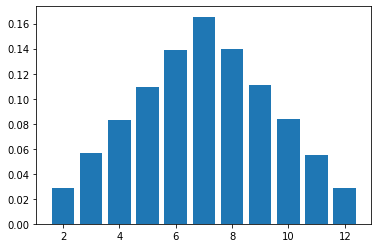

In [38]:
import random
import matplotlib.pyplot as plt
import numpy as np

N=100000

outcome=[]

for i in range(N):
    d1=random.randint(1,6)
    d2=random.randint(1,6)
    outcome.append(d1+d2)
    
valuecount = np.unique(outcome, return_counts=True)

sumall=np.sum(valuecount[1])

plt.bar(valuecount[0], valuecount[1]/sumall)



In [34]:
np.shape(valuecount)

(2, 11)

In [88]:
## Monte-carlo integration

### Find  pi constant

In [94]:
import numpy as np

from IPython.display import display, Markdown


N=10000000

pairxy = np.random.rand(N, 2)
accepted = pairxy[pairxy[:,0]**2+pairxy[:,1]**2 < 1]
mcpi = 4*np.shape(accepted)[0]/N


display(Markdown(
   rf"""
$\pi$ is calculated   {mcpi}
"""))


$\pi$ is calculated   3.1422588


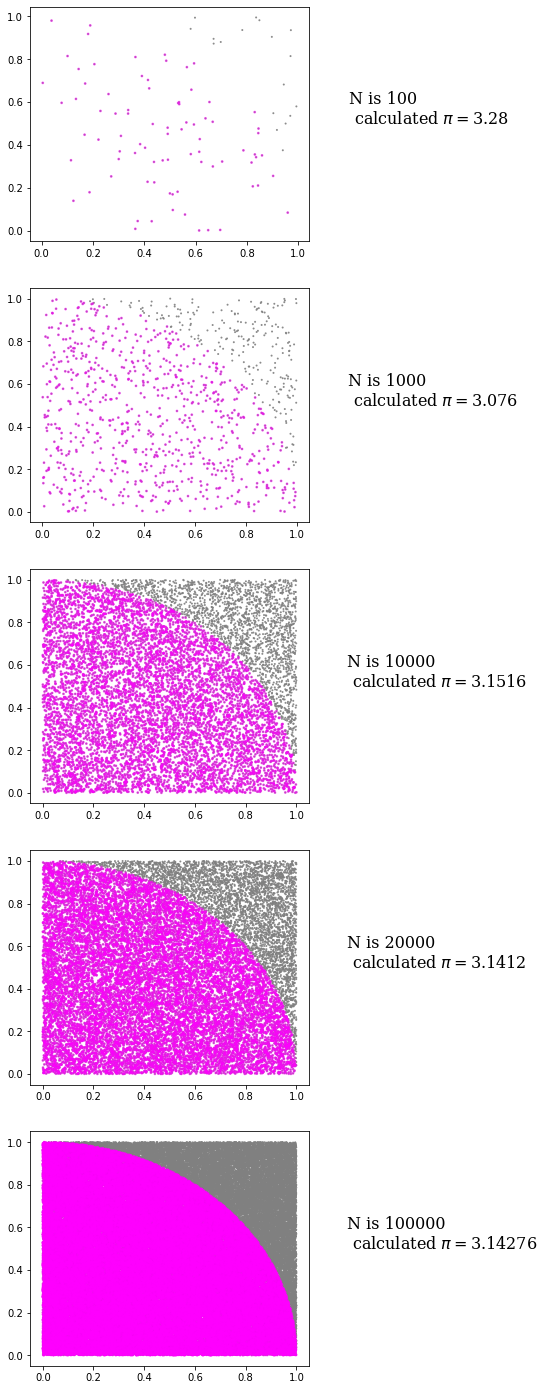

In [109]:
import matplotlib.pyplot as plt

import numpy as np

fig, axs = plt.subplots(5,1, figsize=(5,25))


i=0
for N in [100, 1000, 10000, 20000, 100000]:
    pairxy = np.random.rand(N, 2)
    accepted = pairxy[pairxy[:,0]**2+pairxy[:,1]**2 < 1]
    mcpi = 4*np.shape(accepted)[0]/N
    axs[i].scatter(pairxy[:,0], pairxy[:,1], s=4 , alpha=0.9, c='gray', ec='none')
    axs[i].scatter(accepted[:,0], accepted[:,1], s=8, alpha=0.5, c='magenta', ec='none')
    message='N is '+str(N)+'\n calculated '+r'$\pi =$'+str(mcpi)
    axs[i].text(x=1.2, y=0.5, s=message, fontsize=16, fontfamily='Serif')
    i=i+1

##  SIMPLE ISING MODEL



$$\mathcal{H}=-J\sum_{<ij>}S_iS_j$$









###  1D Ising model

$$ H = -J\sum_{i=0}^{N-1} S_i S_{i+1} - h S_i $$
At the presence of external field



### 2D  ISING model

<div> <img src="ISING.png" alt="Drawing" style="width: 300px;"/></div> 






We will check that the energy function is working by testing the following obvious conditions:

- The energy for all spin down is −NJ+Nh=N(h−J)
- The energy for all spin up is −NJ−Nh=−N(h+J)
- The energy for alternating spin up and half spin down is (if N is even) +NJ

In [122]:

# periodic boundary condition

def energy_ising_1d(configuration,J,h):
    num_spins = len(configuration)
    energy = 0.0
    for i in range(num_spins):
        spini = configuration[i]
        #set the value of spin i+1, make sure to test if i+1<num_spins, and otherwise account for periodic boundaries
        #you can do this with an if statement if you have to
        ip1 = (i+1)%num_spins
        spinip1 = configuration[ip1]
        
        energy = energy - J * (spini * spinip1) - h*spini
        
    return energy
        
#Check that the energy is correct
test_num_spins = 10
#this should be true for any J, h
test_J = 1
test_h = 2

test_configuration_1 = -1*np.ones(test_num_spins)
test_configuration_2 = +1*np.ones(test_num_spins)

test_configuration_3 = +1*np.ones(test_num_spins)
#this sets even entries to -1
test_configuration_3[::2] = -1

print("Test Config 1:", test_configuration_1)
print("Energy Config 1:", energy_ising_1d(test_configuration_1,test_J,test_h))
print("Expected Energy Config 1:",test_num_spins*(test_h-test_J))
print()
print("Test Config 2:", test_configuration_2)
print("Energy Config 2:", energy_ising_1d(test_configuration_2,test_J,test_h))
print("Expected Energy Config 2:",-test_num_spins*(test_h+test_J))
print()
print("Test Config 3:", test_configuration_3)
print("Energy Config 3:", energy_ising_1d(test_configuration_3,test_J,test_h))
print("Expected Energy Config 3:",test_num_spins*test_J)

Test Config 1: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Energy Config 1: 10.0
Expected Energy Config 1: 10

Test Config 2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Energy Config 2: -30.0
Expected Energy Config 2: -30

Test Config 3: [-1.  1. -1.  1. -1.  1. -1.  1. -1.  1.]
Energy Config 3: 10.0
Expected Energy Config 3: 10


###  Metropolis Monte Carlo


1) Calculate energy 
2) Choose a random spin index in range [0,N-1], using numpy.random.randint(N)
3) Change that spin from 1 to -1, or -1 to 1
4) Generate a random number r in range 0 to 1, using numpy.random.random()
5) a) if r < min(1,np.exp(-beta*(delta E))):
     accept move 
     current_energy = energy after flipping
     You can use the python command `pass` to represent not doing anything
   b) otherwise, reject move
       change that spin back to it's old value
       don't update the current energy

In [123]:
#set a seed for the random number generator here. For a given seed, all of your results should be identical
random_seed = 1
np.random.seed(random_seed)

def metropolis_mc_slow(n_steps, n_lattice_sites, beta, J, h, debug=False,save_freq=10):
    # we can start with a random configuration of size n_lattice_sites by generating a random list 
    #    of zeros and twos, then subtracting 1, the following does that, do you see why? Play around 
    #   with this function in an empty box if you don't
    configuration = 2*np.random.randint(2, size=n_lattice_sites) - 1
    average_spins = []
    
    if debug is True: 
        print("Starting configuration:",configuration)
    
    current_energy = energy_ising_1d(configuration,J,h)
    for i in range(n_steps):
        
        spin_to_change = np.random.randint(n_lattice_sites)
        # Change configuration[spin_to_change] to it's opposite value (1->-1, -1->1). 
        # There is a very simple mathematical operation that does this, regarless of it's current value
        configuration[spin_to_change] *= -1
        
        energy_flip = energy_ising_1d(configuration,J,h)
        
        r = np.random.random()
        #do metropolis test w/ this random nubmer r 
        if r<min(1,np.exp(-beta*(energy_flip-current_energy))):
            current_energy = energy_flip
        else:
            #set spin back the same way you did before
            configuration[spin_to_change] *= -1
        
        #this computes the average of the spin observable
        average_spin = configuration.mean()
        
        if i%save_freq == 0:
            average_spins.append(average_spin)

        if debug and i%10==0: 
            print("%i: "%i,configuration,"Energy:",current_energy,"Spin:",average_spin)
    
    return average_spins
            
#do a test high temperature simulation
print("High temperature:")
average_spins = metropolis_mc_slow(n_steps=100, n_lattice_sites=10, beta=0.1, J=1, h=2, debug=True)
#do a test on a low temperature simulation
print("Low temperature:")
average_spins = metropolis_mc_slow(n_steps=100, n_lattice_sites=10, beta=1, J=1, h=2, debug=True)

High temperature:
Starting configuration: [ 1  1 -1 -1  1  1  1  1  1 -1]
0:  [-1  1 -1 -1  1  1  1  1  1 -1] Energy: -6.0 Spin: 0.2
10:  [-1  1  1 -1 -1  1  1  1  1  1] Energy: -10.0 Spin: 0.4
20:  [ 1 -1  1  1  1 -1  1 -1  1  1] Energy: -6.0 Spin: 0.4
30:  [ 1 -1 -1  1  1  1 -1 -1  1  1] Energy: -6.0 Spin: 0.2
40:  [-1 -1 -1 -1  1  1  1 -1 -1  1] Energy: 2.0 Spin: -0.2
50:  [-1  1 -1  1 -1  1 -1 -1 -1 -1] Energy: 10.0 Spin: -0.4
60:  [-1  1  1  1  1  1  1  1  1 -1] Energy: -18.0 Spin: 0.6
70:  [-1 -1 -1 -1 -1 -1  1 -1  1 -1] Energy: 10.0 Spin: -0.6
80:  [ 1  1  1  1 -1 -1  1  1 -1 -1] Energy: -6.0 Spin: 0.2
90:  [-1  1  1 -1  1 -1 -1  1  1 -1] Energy: 2.0 Spin: 0.0
Low temperature:
Starting configuration: [-1 -1  1 -1 -1 -1  1 -1  1  1]
0:  [ 1 -1  1 -1 -1 -1  1 -1  1  1] Energy: 2.0 Spin: 0.0
10:  [ 1 -1  1  1  1  1  1  1  1  1] Energy: -22.0 Spin: 0.8
20:  [1 1 1 1 1 1 1 1 1 1] Energy: -30.0 Spin: 1.0
30:  [1 1 1 1 1 1 1 1 1 1] Energy: -30.0 Spin: 1.0
40:  [1 1 1 1 1 1 1 1 1 1] Ene

<IPython.core.display.Javascript object>


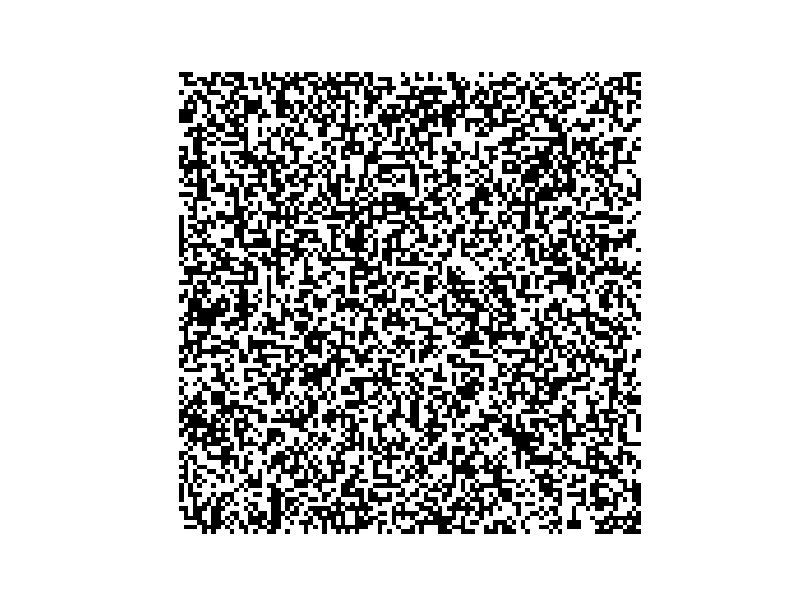

In [119]:


%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


N=100  #The discretization parameter. There are N^2 points.
T = 0.001   #The temperature of the system.


#setting up the figure
fig = plt.figure()
plt.axis('off')
initial_spins = np.random.choice([-1,1], size=(N,N))
initial_spins[0,0] = -1
im = plt.imshow(initial_spins, cmap = 'gray')





<IPython.core.display.Javascript object>


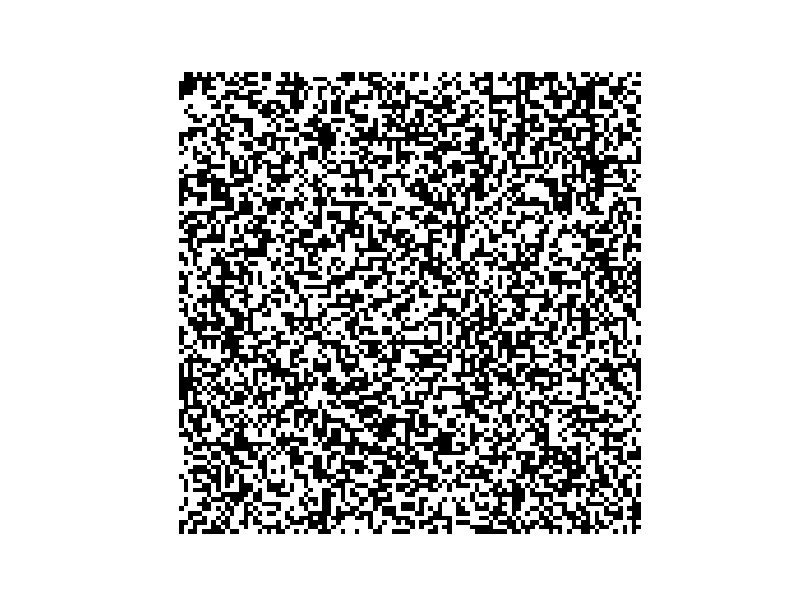

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


N=100  #The discretization parameter. There are N^2 points.
T = 0.001   #The temperature of the system.


#setting up the figure
fig = plt.figure()
plt.axis('off')
initial_spins = np.random.choice([-1,1], size=(N,N))
initial_spins[0,0] = -1
im = plt.imshow(initial_spins, cmap = 'gray')


def animate(i):
    for _ in range(0, 100):
        initial_spins = np.random.choice([-1,1], size=(N,N))
        im = plt.imshow(initial_spins, cmap = 'gray')
             
    return [im]




anim = animation.FuncAnimation(fig, animate,blit=True)

<IPython.core.display.Javascript object>


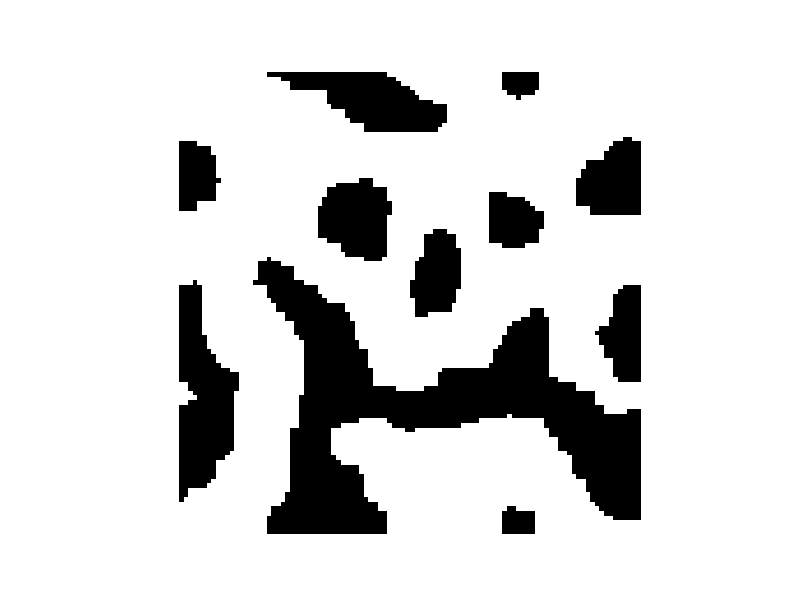

In [116]:

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


N=100  #The discretization parameter. There are N^2 points.
T = 0.001   #The temperature of the system.

flips_per_frame = N*N//20
number_of_frames = 100000

#setting up the figure
fig = plt.figure()
plt.axis('off')
initial_spins = np.random.choice([-1,1], size=(N,N))
initial_spins[0,0] = -1
im = plt.imshow(initial_spins, cmap = 'gray')

# animation function.  This is called sequentially
def animate(i):
    for _ in range(0, flips_per_frame):
         i = np.random.randint(0,N)
         j = np.random.randint(0,N)
         
         spins = im.get_array()
         # %N gives periodic boundary conditions.
         deltaE = 2*spins[i,j]*(spins[(i+1)%N,j] + spins[i,(j+1)%N] 
                                 + spins[(i-1)%N,j] + spins[i,(j-1)%N]) 
         
         if deltaE < 0:
             spins[i,j] *= -1
         
         elif  np.random.uniform() < np.exp(-deltaE/T):
             spins[i,j] *= -1
             
    return [im]
    
anim = animation.FuncAnimation(fig, animate,
                               frames=number_of_frames, interval=20, blit=True)


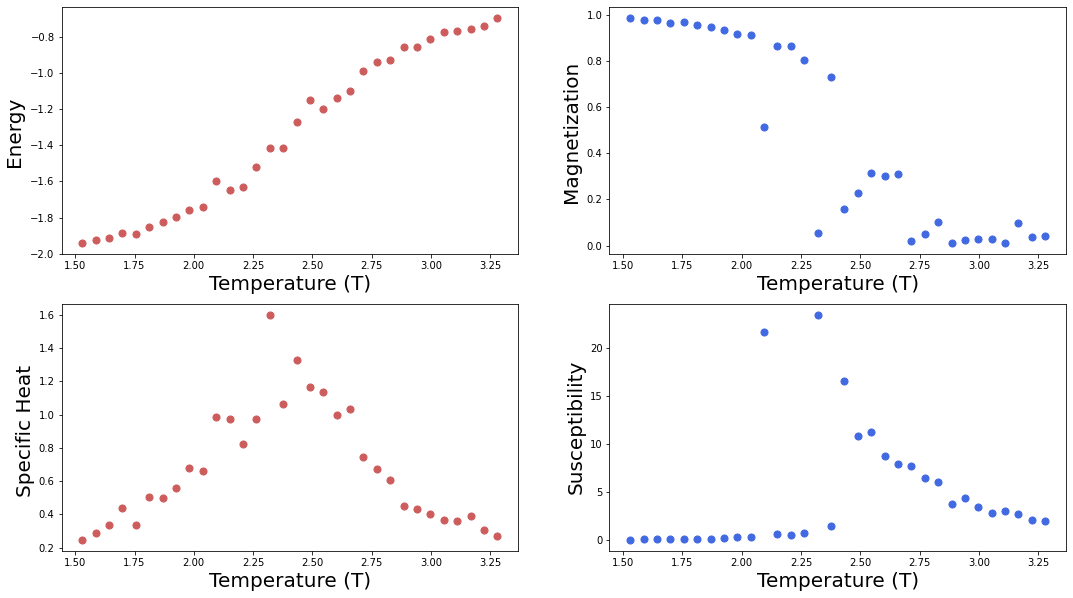

In [111]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye


##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------



def initialstate(N):   
    ''' 
    Generates a random spin configuration for initial condition
    '''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state



def mcmove(config, beta):
    '''
    Monte Carlo move using Metropolis algorithm 
    '''
    
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config



def calcEnergy(config):
    '''
    Energy of a given configuration
    '''
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting



def calcMag(config):
    '''
    Magnetization of a given configuration
    '''
    mag = np.sum(config)
    return mag




## NOTE: change these parameters for a smaller and faster simulation 
#----------------------------------------------------------------------


nt      = 32         #  number of temperature points
N       = 10         #  size of the lattice, N x N
eqSteps = 2**8       #  number of MC sweeps for equilibration
mcSteps = 2**9       #  number of MC sweeps for calculation


T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values








#  MAIN PART OF THE CODE
#----------------------------------------------------------------------


for tt in range(nt):
    config = initialstate(N)         # initialise

    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene


    # divide by number of sites and iteractions to obtain intensive values    
    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT
    
    
    
    
    
    
    
    
    
#  plot the calculated values   
#----------------------------------------------------------------------

f = plt.figure(figsize=(18, 10)); #  


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');